<a href="https://colab.research.google.com/github/nikhilsharmaz/ChessEngineParallelization/blob/main/CAOfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from subprocess import call
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/parallel_chess_engine

/content/drive/MyDrive/parallel_chess_engine


In [ ]:
%pwd

'/content/drive/MyDrive/parallel_chess_engine'

In [ ]:
def simulation(progName, nGames=10, depth=4):


    fileName = "results.txt"
    #To store the timing values (means) for a specific depth
    oldMeanPerDepth = []
    newMeanPerDepth = []

    #To store the number of nodes visited from root until a specific depth
    oldNodeNumPerDepth = []
    newNodeNumPerDepth = []

    #To store the timing values (means) for all depths [THose that are going to be used for plottig]
    oldGlobalMean = []
    newGlobalMean = []

    #To store the number of noes visited for all depths [THose that are going to be used for plottig]
    oldNodeNum = []
    newNodeNum = []

     #the result
    stats = namedtuple("Stats", ["oldGlobalMean", "newGlobalMean", "oldNodeNum", "newNodeNum"])

    #generate all the possible depths
    depths = range(1, depth + 1)

    for h in depths:
        for g in range(nGames):
            retCode = call([progName, str(h)])
            with open(fileName, "r") as f: #filename is the file path to the file generated by the chess engine written in C
                #first two lines in the file represent the number of nodes visited for both the first algorithm aand the second one respectively
                oldNodeNumPerDepth.append(float(f.readline().strip(" ")))
                newNodeNumPerDepth.append(float(f.readline().strip(" ")))

                #we calculate for each depth, for each game the mean of the time taken by one program to perform a move
                old = list(map(float, f.readline().strip().split()))
                new = list(map(float, f.readline().strip().split()))
                oldMeanPerDepth.append(sum(old) / len(old))
                newMeanPerDepth.append(sum(new) / len(new))

        #we assigne the infomation relative to each depth to the global lists
        oldGlobalMean.append(sum(oldMeanPerDepth) / len(oldMeanPerDepth))
        newGlobalMean.append(sum(newMeanPerDepth) / len(newMeanPerDepth))
        oldNodeNum.append(int(sum(oldNodeNumPerDepth) / len(oldNodeNumPerDepth)))
        newNodeNum.append(int(sum(newNodeNumPerDepth) / len(newNodeNumPerDepth)))
        oldMeanPerDepth  = []
        newMeanPerDepth = []
        oldNodeNumPerDepth = []
        newNodeNumPerDepth = []

    #assign everything to the named tuple
    stats.oldGlobalMean = oldGlobalMean
    stats.newGlobalMean = newGlobalMean
    stats.oldNodeNum = oldNodeNum
    stats.newNodeNum = newNodeNum
    return stats


In [ ]:
def plotting(stats, old_name, new_name, depth=4):

    # Generate all the possible depths
    depths = range(1, depth + 1)

    # Only for plotting purposes
    offset = 0.2
    figure = plt.subplot(121)
    figure.bar(np.array(depths) - offset, stats.oldGlobalMean[:depth], width=2 * offset, color="lime")
    figure.bar(np.array(depths) + offset, stats.newGlobalMean[:depth], width=2 * offset, color="cyan")
    plt.xlabel("Depth")
    plt.ylabel("Execution time (s)")
    plt.legend([old_name, new_name])

    figure = plt.subplot(122)
    figure.bar(np.array(depths) - offset, stats.oldNodeNum[:depth], width=2 * offset, color="lime")
    figure.bar(np.array(depths) + offset, stats.newNodeNum[:depth], width=2 * offset, color="cyan")
    plt.xlabel("Depth")
    plt.ylabel("Visited nodes")
    plt.legend([old_name, new_name])
    plt.show()
    plt.close()


In [ ]:
!chmod +rx src/seq_vs_paral.c


In [ ]:
!gcc -o seq_vs_paral src/seq_vs_paral.c


Sequential Execution Time: 0.7437697066666665 seconds
Parallel Execution Time: 0.7206082866666668 seconds
Sequential Visited Nodes: 11472930
Parallel Visited Nodes: 12064469


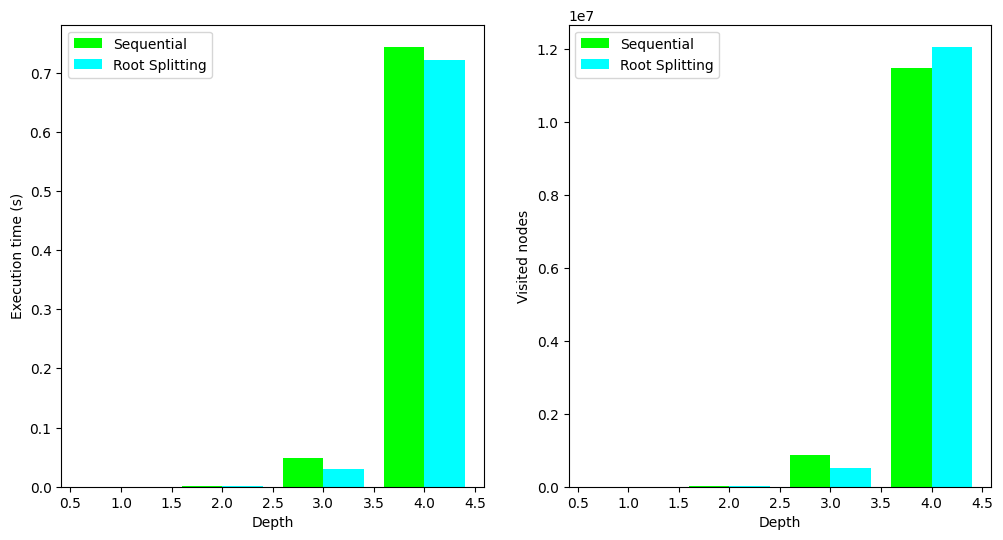

In [ ]:
stats = simulation("./seq_vs_paral", nGames=3)

# Extracting the last execution times for Sequential and Parallel
sequential_execution_time = stats.oldGlobalMean[-1]
parallel_execution_time = stats.newGlobalMean[-1]

print(f"Sequential Execution Time: {sequential_execution_time} seconds")
print(f"Parallel Execution Time: {parallel_execution_time} seconds")

# Extracting the last visited nodes for Sequential and Parallel
sequential_visited_nodes = stats.oldNodeNum[-1]
parallel_visited_nodes = stats.newNodeNum[-1]

print(f"Sequential Visited Nodes: {sequential_visited_nodes}")
print(f"Parallel Visited Nodes: {parallel_visited_nodes}")

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)

plotting(stats, "Sequential", "Root Splitting")

In [ ]:
stats.oldGlobalMean[-1]/stats.newGlobalMean[-1]

1.0321414843938834

In [ ]:
!chmod +rx src/sequential_vs_beam_search.c

In [ ]:
!gcc -o sequential_vs_beam_search src/sequential_vs_beam_search.c

Sequential Execution Time: 0.7672761533333331 seconds
Root Splitting Execution Time: 0.4485544399999999 seconds
Sequential Visited Nodes: 13128497
Root Splitting Visited Nodes: 1082572


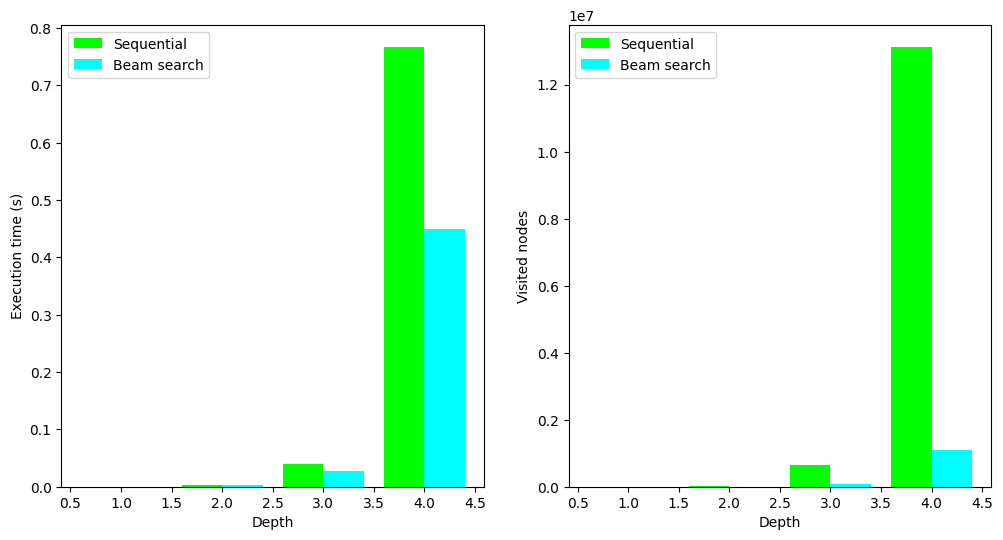

In [ ]:
stats = simulation("./sequential_vs_beam_search", nGames=3)

# Extracting the last execution times for Sequential and Root Splitting
sequential_execution_time = stats.oldGlobalMean[-1]
root_splitting_execution_time = stats.newGlobalMean[-1]

print(f"Sequential Execution Time: {sequential_execution_time} seconds")
print(f"Root Splitting Execution Time: {root_splitting_execution_time} seconds")

# Extracting the last visited nodes for Sequential and Root Splitting
sequential_visited_nodes = stats.oldNodeNum[-1]
root_splitting_visited_nodes = stats.newNodeNum[-1]

print(f"Sequential Visited Nodes: {sequential_visited_nodes}")
print(f"Root Splitting Visited Nodes: {root_splitting_visited_nodes}")

plotting(stats, "Sequential", "Beam search")

In [ ]:
stats.oldGlobalMean[-1]/stats.newGlobalMean[-1]

1.7105530230251054